In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv('logisticX.csv').values
y=pd.read_csv('logisticY.csv').values

Optimized Coefficients (Theta): [ 0.41183623  2.42635778 -2.6257309 ]
Cost Function Value After Convergence: 0.22565873037480239


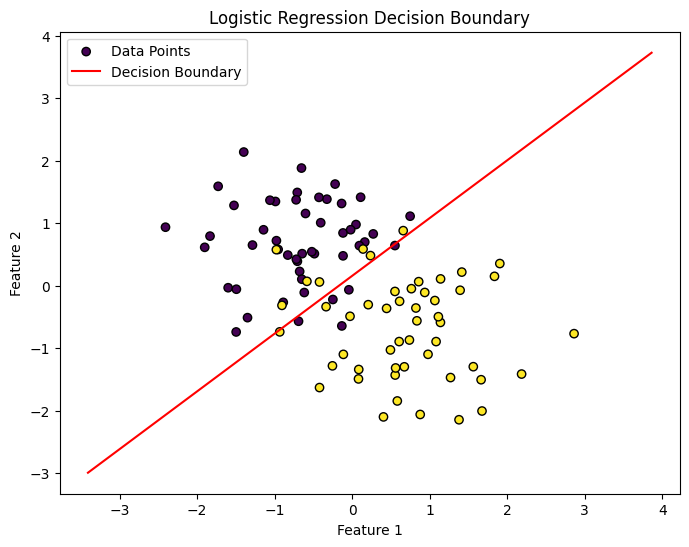

In [3]:
y = y.flatten()
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -(1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters, tolerance=1e-6):
    m = len(y)
    cost_history = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    
    return theta, cost_history

theta = np.zeros(X.shape[1]) 
alpha = 0.1                  
num_iters = 10000          

theta_optimized, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

print("Optimized Coefficients (Theta):", theta_optimized)
print("Cost Function Value After Convergence:", cost_history[-1])

def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k', label='Data Points')
    
    x_values = [np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1]
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='red')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, theta_optimized)

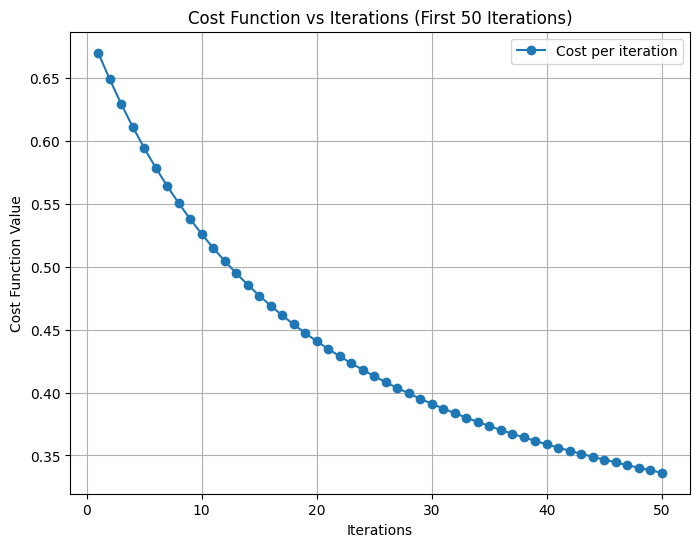

In [4]:
def plot_cost_vs_iterations(cost_history):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, min(len(cost_history), 51)), cost_history[:50], marker='o', label='Cost per iteration')
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function Value')
    plt.title('Cost Function vs Iterations (First 50 Iterations)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cost_vs_iterations(cost_history)

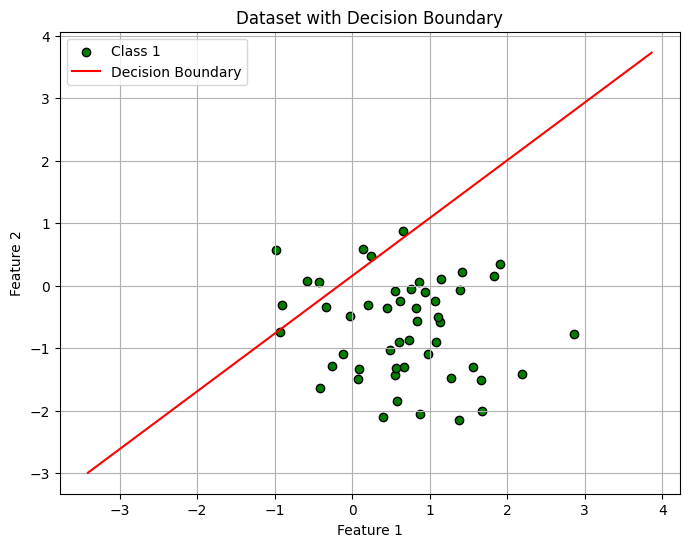

In [5]:
def plot_dataset_and_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    
    plt.scatter(class_1[:, 1], class_1[:, 2], color='green', label='Class 1', edgecolor='k')
    
    x_values = [np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1]  
    y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='red')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dataset_and_decision_boundary(X, y, theta_optimized)

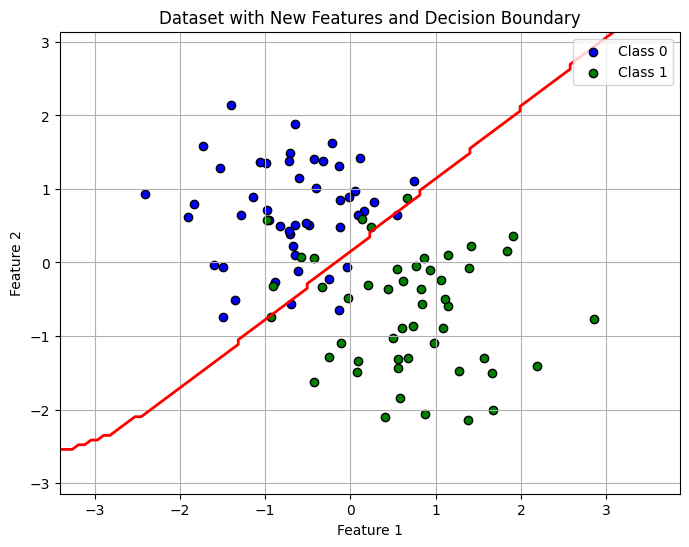

In [6]:
X_new = np.hstack((X, X[:, 1:] ** 2))

theta_new = np.zeros(X_new.shape[1])  
alpha = 0.1                          
num_iters = 10000                   

theta_optimized_new, cost_history_new = gradient_descent(X_new, y, theta_new, alpha, num_iters)

def plot_dataset_and_decision_boundary_with_new_features(X, y, theta):
    plt.figure(figsize=(8, 6))
    
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    
    plt.scatter(class_0[:, 1], class_0[:, 2], color='blue', label='Class 0', edgecolor='k')
    plt.scatter(class_1[:, 1], class_1[:, 2], color='green', label='Class 1', edgecolor='k')
    
    x1_min, x1_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
    x2_min, x2_max = np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                           np.linspace(x2_min, x2_max, 100))
    
    Z = sigmoid(theta[0] + theta[1] * xx1 + theta[2] * xx2 +
                theta[3] * (xx1 ** 2) + theta[4] * (xx2 ** 2))
    Z = Z >= 0.5 
    

    plt.contour(xx1, xx2, Z, levels=[0.5], colors='red', linewidths=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with New Features and Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dataset_and_decision_boundary_with_new_features(X_new, y, theta_optimized_new)


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= 0.5).astype(int)

y_pred = predict(X_new, theta_optimized_new)

conf_matrix = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Confusion Matrix:
[[44  5]
 [ 7 43]]

Metrics:
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1-Score: 0.8776
